<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** TAHSIN AFROZ

**Student ID:** 223137186

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations


**Aim:** The primary objective is to comprehensively address the business problem of identifying and mitigating blackspots—areas prone to accidents. This issue is critical for public safety, infrastructure preservation, and the DOT's commitment to ensuring secure transportation.

**Business Problem:** The business problem centres on the accurate prediction of blackspots by understanding their contributing factors.

The analysis drives business solutions with specific strategies for blackspot identification and road safety. Recommendations include converting high-traffic intersections to roundabouts and strict alcohol testing near licensed venues. Aimed at the DOT senior management, these actions align with targeted interventions like education campaigns, legislative reforms, and infrastructure enhancements.


<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation



In [ ]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [ ]:
# load dataset
from google.colab import drive
drive.mount('/content/drive')
records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710/T2 A1/Blackspot.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#explore the dataset
records

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,3699,GROVE ROAD,GROVE,ROAD,0.122,0.059,0.229,0.270,0.854,0.321,...,0.358,0.000,14.000,non-Intersection,0,0,0,0,0,Blackspot
1,576,BACCHUS MARSH ROAD,BACCHUS MARSH,ROAD,0.216,0.142,0.313,0.201,0.742,0.128,...,0.000,1.000,0.000,Intersection,0,0,0,1,0,Blackspot
2,758,GRUBBED ROAD,GRUBBED,ROAD,0.185,0.102,0.195,0.348,0.757,0.169,...,1.000,0.000,0.000,non-Intersection,0,0,0,0,0,non-Blackspot
3,89,VIGOR STREET,VIGOR,STREET,0.168,0.062,0.286,0.322,0.816,0.161,...,0.037,0.000,0.000,non-Intersection,0,0,0,0,0,non-Blackspot
4,8773,FAIRMAN ROAD,FAIRMAN,ROAD,0.201,0.108,0.204,0.341,0.762,0.146,...,0.000,1.000,0.000,non-Intersection,0,0,0,0,0,non-Blackspot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,256,WARBURTON-WOODS POINT ROAD,WARBURTON-WOODS POINT,ROAD,0.152,0.088,0.199,0.386,0.813,0.175,...,1.000,0.000,0.000,non-Intersection,0,0,0,1,0,non-Blackspot
5322,5182,GLENELG HIGHWAY,GLENELG,HIGHWAY,0.142,0.090,0.209,0.328,0.817,0.230,...,0.000,0.156,0.000,non-Intersection,0,0,0,0,0,non-Blackspot
5323,4196,CAPE PATERSON ROAD,CAPE PATERSON,ROAD,0.164,0.107,0.171,0.352,0.779,0.206,...,0.000,1.000,0.000,non-Intersection,0,0,0,1,0,non-Blackspot
5324,4352,MCPHANS ROAD,MCPHANS,ROAD,0.155,0.173,0.129,0.310,0.806,0.233,...,0.000,1.000,0.000,non-Intersection,0,0,0,0,0,non-Blackspot


In [ ]:
# summary information about the dataset
records.info()
records.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5317 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

(5326, 36)

In [ ]:
# the first few rows of the dataset
records.head()

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,3699,GROVE ROAD,GROVE,ROAD,0.122,0.059,0.229,0.270,0.854,0.321,...,0.358,0.000,14.000,non-Intersection,0,0,0,0,0,Blackspot
1,576,BACCHUS MARSH ROAD,BACCHUS MARSH,ROAD,0.216,0.142,0.313,0.201,0.742,0.128,...,0.000,1.000,0.000,Intersection,0,0,0,1,0,Blackspot
2,758,GRUBBED ROAD,GRUBBED,ROAD,0.185,0.102,0.195,0.348,0.757,0.169,...,1.000,0.000,0.000,non-Intersection,0,0,0,0,0,non-Blackspot
3,89,VIGOR STREET,VIGOR,STREET,0.168,0.062,0.286,0.322,0.816,0.161,...,0.037,0.000,0.000,non-Intersection,0,0,0,0,0,non-Blackspot
4,8773,FAIRMAN ROAD,FAIRMAN,ROAD,0.201,0.108,0.204,0.341,0.762,0.146,...,0.000,1.000,0.000,non-Intersection,0,0,0,0,0,non-Blackspot


In [ ]:
# Csummary statistics of numerical features
records.describe()

,ID,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,SEO_PERSONS_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,...,Industrial%,Residential%,Parkland%,Primary_Production%,Lq_Licenses,Supermarket,primary_school,secondary_school,km_post,traffic_signal
count,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,5317.000,5326.000,5326.000,5326.000,...,5326.000,5326.000,5326.000,5326.000,5320.000,5326.000,5326.000,5326.000,5326.000,5326.000
mean,4996.381,0.175,0.100,0.203,0.307,0.774,0.203,0.885,0.444,0.401,...,0.010,0.393,0.137,0.375,0.378,0.013,0.026,0.005,0.127,0.022
std,2885.736,0.051,0.031,0.055,0.068,0.102,0.105,0.107,0.106,0.115,...,0.070,0.413,0.278,0.432,1.551,0.111,0.158,0.067,0.334,0.148
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2477.000,0.145,0.080,0.172,0.274,0.752,0.149,0.871,0.387,0.342,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,5020.500,0.177,0.102,0.197,0.317,0.779,0.181,0.897,0.450,0.407,...,0.000,0.227,0.000,0.081,0.000,0.000,0.000,0.000,0.000,0.000
75%,7478.750,0.206,0.123,0.234,0.348,0.816,0.237,0.928,0.500,0.477,...,0.000,0.833,0.115,0.963,0.000,0.000,0.000,0.000,0.000,0.000
max,9999.000,0.329,0.198,0.609,0.491,1.000,1.000,1.000,1.088,0.786,...,1.000,1.000,1.000,1.000,26.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
#formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data_types =['object', 'float', 'int']
records.describe(include=data_types)

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
count,5326.000,5326,5326,5326,5326.000,5326.000,5326.000,5326.000,5326.000,5317.000,...,5326.000,5326.000,5320.000,5326,5326.000,5326.000,5326.000,5326.000,5326.000,5326
unique,NaN,2185,2020,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,BASS HIGHWAY,PRINCES,ROAD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,non-Intersection,NaN,NaN,NaN,NaN,NaN,non-Blackspot
freq,NaN,52,75,3400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4659,NaN,NaN,NaN,NaN,NaN,4759
mean,4996.381,NaN,NaN,NaN,0.175,0.100,0.203,0.307,0.774,0.203,...,0.137,0.375,0.378,NaN,0.013,0.026,0.005,0.127,0.022,NaN
std,2885.736,NaN,NaN,NaN,0.051,0.031,0.055,0.068,0.102,0.105,...,0.278,0.432,1.551,NaN,0.111,0.158,0.067,0.334,0.148,NaN
min,1.000,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,NaN
25%,2477.000,NaN,NaN,NaN,0.145,0.080,0.172,0.274,0.752,0.149,...,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,NaN
50%,5020.500,NaN,NaN,NaN,0.177,0.102,0.197,0.317,0.779,0.181,...,0.000,0.081,0.000,NaN,0.000,0.000,0.000,0.000,0.000,NaN
75%,7478.750,NaN,NaN,NaN,0.206,0.123,0.234,0.348,0.816,0.237,...,0.115,0.963,0.000,NaN,0.000,0.000,0.000,0.000,0.000,NaN


In [ ]:
# the number of missing values in each column
print(records.isnull().sum().sort_values(ascending=0))

AGE_65YRS_OVER_PCNT                9
Lq_Licenses                        6
Primary_Production%                0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
ID                                 0
DWELLING_FLAT_UNIT_APART_PCNT      0
Intersection                       0
Supermarket                        0
primary_school                     0
secondary_school                   0
km_post                            0
traffic_signal                     0
OCCUPATION_WHITE_COLLAR_PCNT       0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
EZI_ROAD_NAME                      0
AGE_18YRS_OVER_PCNT                0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
S

In [ ]:
# remove missing data
records['AGE_65YRS_OVER_PCNT'].fillna(records['AGE_65YRS_OVER_PCNT'].median(),inplace=True)
records['Lq_Licenses'].fillna(records['Lq_Licenses'].median(),inplace=True)
print(records.isnull().sum().sort_values(ascending=0))

ID                                 0
EZI_ROAD_NAME                      0
OCCUPATION_WHITE_COLLAR_PCNT       0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
Primary_Production%                0
Lq_Licenses                        0
Intersection                       0
Supermarket                        0
primary_school                     0
secondary_school                   0
km_post                            0
traffic_signal                     0
DWELLING_FLAT_UNIT_APART_PCNT      0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
DWELLING_SEP_HOUSE_PCNT            0
AGE_18YRS_OVER_PCNT                0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
A

In [ ]:
columns_to_check = ['ID', 'ROAD_NAME','EZI_ROAD_NAME']
duplicates_specific = records[records.duplicated(subset=columns_to_check)]
print(duplicates_specific)

Empty DataFrame
Columns: [ID, EZI_ROAD_NAME, ROAD_NAME, ROAD_TYPE, AGE_LESS_THAN_15YRS_PCNT, AGE_15_24YRS_PCNT, AGE_25_44YRS_PCNT, AGE_45_64YRS_PCNT, AGE_18YRS_OVER_PCNT, AGE_65YRS_OVER_PCNT, SEO_PERSONS_PCNT, FC_COUPLE_NO_CHILDREN_PCNT, FC_COUPLE_WITH_CHILDREN_PCNT, FC_SINGLE_PARENT, CARS_ZERO_HH_PCNT, CARS_ONE_HH_PCNT, CARS_TWO_OR_MORE_HH_PCNT, DWELLING_SEP_HOUSE_PCNT, DWELLING_SEMID_RO_OR_TCE_H_TH_P, DWELLING_FLAT_UNIT_APART_PCNT, OCCUPATION_WHITE_COLLAR_PCNT, OCCUPATION_BLUE_COLLAR_PCNT, SEIFA, Commercial%, Industrial%, Residential%, Parkland%, Primary_Production%, Lq_Licenses, Intersection, Supermarket, primary_school, secondary_school, km_post, traffic_signal, Blackspot]
Index: []

[0 rows x 36 columns]


In [ ]:
# correlation from the dataset
records.corr()

<ipython-input-434-4d2dfe0d2e0a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  records.corr()


,ID,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,SEO_PERSONS_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,...,Industrial%,Residential%,Parkland%,Primary_Production%,Lq_Licenses,Supermarket,primary_school,secondary_school,km_post,traffic_signal
ID,1.000,0.040,0.060,-0.023,-0.008,-0.011,-0.008,0.047,-0.008,0.003,...,0.008,-0.015,-0.012,-0.032,0.005,0.016,0.020,-0.017,0.003,0.004
AGE_LESS_THAN_15YRS_PCNT,0.040,1.000,0.384,0.668,0.091,-0.118,-0.583,0.480,-0.228,0.753,...,-0.006,0.059,-0.268,0.136,-0.121,-0.100,0.018,0.015,0.019,-0.036
AGE_15_24YRS_PCNT,0.060,0.384,1.000,0.318,0.220,0.100,-0.400,0.432,-0.117,0.597,...,-0.010,-0.069,-0.270,0.204,-0.052,0.000,0.028,0.026,0.013,0.013
AGE_25_44YRS_PCNT,-0.023,0.668,0.318,1.000,-0.027,0.103,-0.471,0.437,-0.080,0.545,...,0.069,0.258,-0.276,-0.066,0.010,-0.038,0.040,0.014,-0.021,0.038
AGE_45_64YRS_PCNT,-0.008,0.091,0.220,-0.027,1.000,0.475,-0.196,0.532,0.522,0.286,...,-0.173,-0.266,-0.062,0.310,-0.078,-0.063,-0.042,-0.038,0.042,-0.070
AGE_18YRS_OVER_PCNT,-0.011,-0.118,0.100,0.103,0.475,1.000,0.575,0.672,0.641,-0.021,...,-0.016,0.103,-0.161,0.004,0.103,0.073,0.009,-0.002,0.018,0.047
AGE_65YRS_OVER_PCNT,-0.008,-0.583,-0.400,-0.471,-0.196,0.575,1.000,0.008,0.351,-0.586,...,0.053,0.142,0.083,-0.192,0.145,0.122,0.008,0.011,0.002,0.057
SEO_PERSONS_PCNT,0.047,0.480,0.432,0.437,0.532,0.672,0.008,1.000,0.408,0.511,...,0.002,0.060,-0.344,0.165,-0.031,-0.025,0.021,0.005,0.038,0.008
FC_COUPLE_NO_CHILDREN_PCNT,-0.008,-0.228,-0.117,-0.080,0.522,0.641,0.351,0.408,1.000,-0.235,...,0.007,0.014,-0.082,0.059,0.099,0.050,-0.010,-0.022,0.021,-0.010
FC_COUPLE_WITH_CHILDREN_PCNT,0.003,0.753,0.597,0.545,0.286,-0.021,-0.586,0.511,-0.235,1.000,...,-0.072,-0.105,-0.283,0.283,-0.134,-0.095,-0.010,0.001,0.024,-0.041


In [ ]:
# Drop irrelevant columns
records.drop(['ID','EZI_ROAD_NAME','ROAD_NAME','SEO_PERSONS_PCNT','FC_COUPLE_NO_CHILDREN_PCNT','FC_COUPLE_WITH_CHILDREN_PCNT','FC_SINGLE_PARENT','OCCUPATION_WHITE_COLLAR_PCNT','OCCUPATION_BLUE_COLLAR_PCNT','AGE_LESS_THAN_15YRS_PCNT','AGE_18YRS_OVER_PCNT','DWELLING_SEMID_RO_OR_TCE_H_TH_P','DWELLING_FLAT_UNIT_APART_PCNT'], axis=1, inplace=True)
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ROAD_TYPE                 5326 non-null   object 
 1   AGE_LESS_THAN_15YRS_PCNT  5326 non-null   float64
 2   AGE_18YRS_OVER_PCNT       5326 non-null   float64
 3   CARS_ZERO_HH_PCNT         5326 non-null   float64
 4   CARS_ONE_HH_PCNT          5326 non-null   float64
 5   CARS_TWO_OR_MORE_HH_PCNT  5326 non-null   float64
 6   SEIFA                     5326 non-null   int64  
 7   Commercial%               5326 non-null   float64
 8   Industrial%               5326 non-null   float64
 9   Residential%              5326 non-null   float64
 10  Parkland%                 5326 non-null   float64
 11  Primary_Production%       5326 non-null   float64
 12  Lq_Licenses               5326 non-null   float64
 13  Intersection              5326 non-null   object 
 14  Supermar

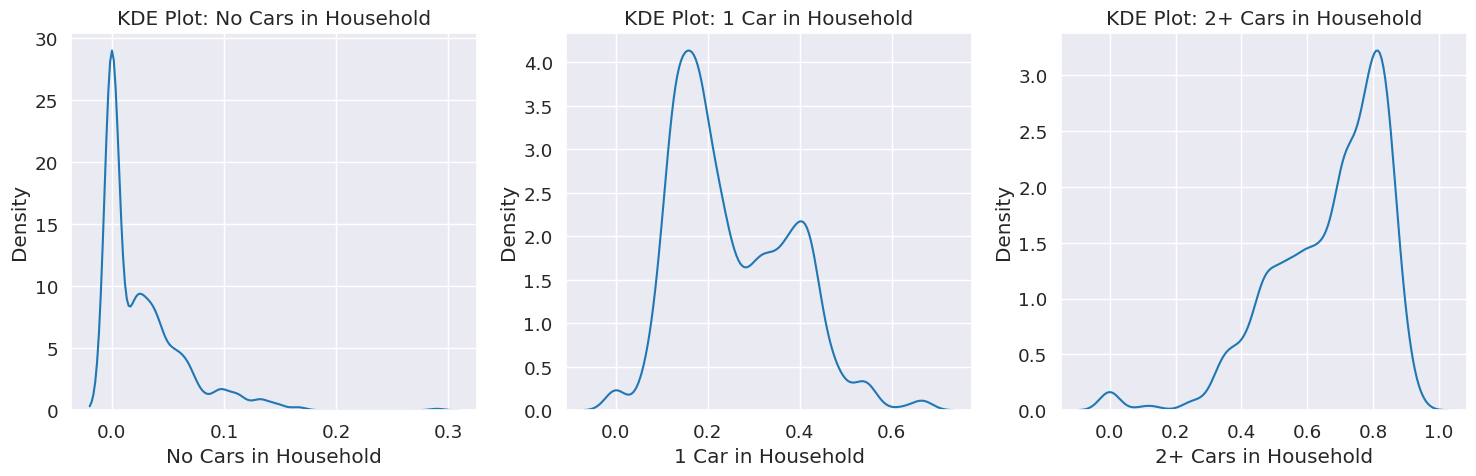

In [ ]:
cars_labels = {
    'CARS_ZERO_HH_PCNT': 'No Cars in Household',
    'CARS_ONE_HH_PCNT': '1 Car in Household',
    'CARS_TWO_OR_MORE_HH_PCNT': '2+ Cars in Household'
}

cars_columns = ['CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(cars_columns):
    sns.kdeplot(data=records, x=col, ax=axes[idx])
    axes[idx].set_title(f"KDE Plot: {cars_labels[col]}")
    axes[idx].set_xlabel(cars_labels[col])

plt.tight_layout()
plt.show()

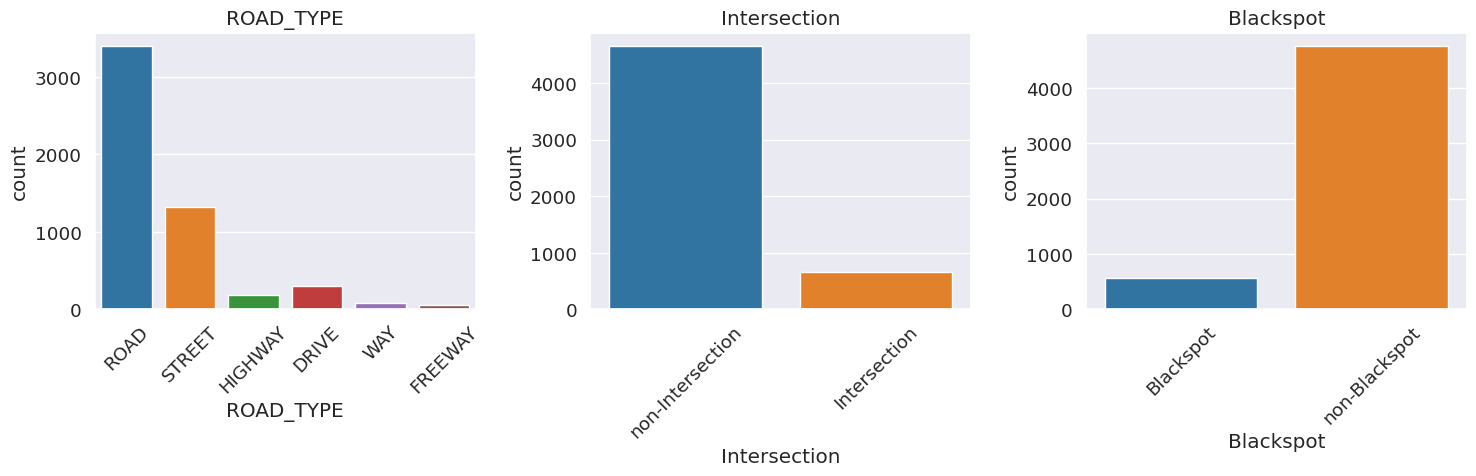

In [ ]:
categorical_variables = records.select_dtypes(include=['object']).columns.tolist()
num_variables = len(categorical_variables)
rows = 1
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

for idx, variable in enumerate(categorical_variables):
    ax = axes[idx % cols]
    sns.countplot(x=records[variable], ax=ax)
    ax.set_title(variable)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

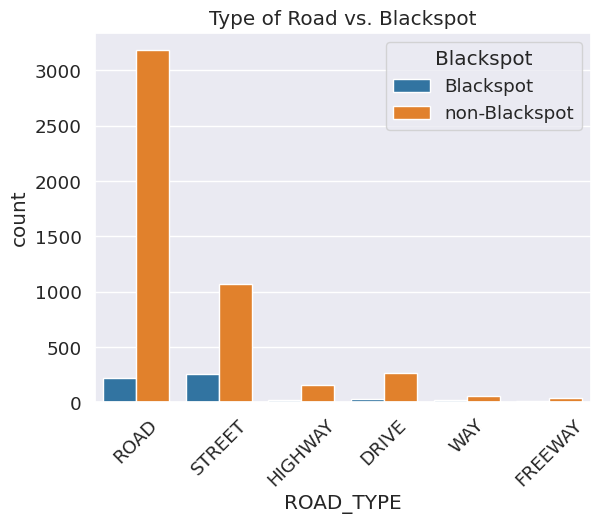

In [ ]:
sns.countplot(x='ROAD_TYPE', hue='Blackspot', data=records)
plt.title("Type of Road vs. Blackspot")
plt.xticks(rotation=45)
plt.show()


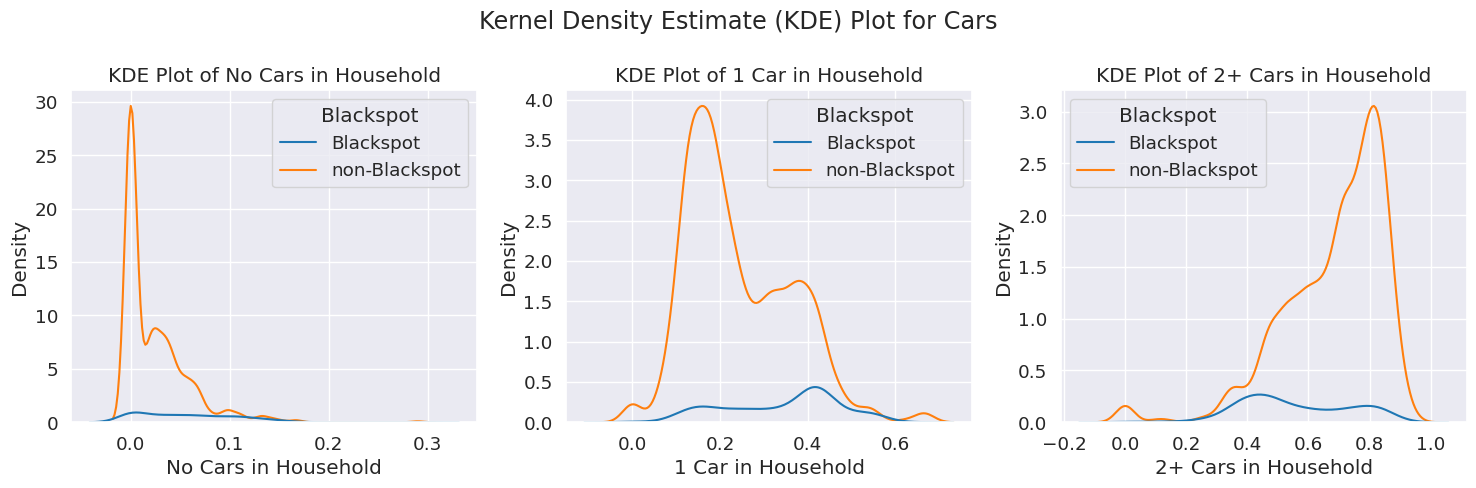

In [ ]:
cars_labels = {
    'CARS_ZERO_HH_PCNT': 'No Cars in Household',
    'CARS_ONE_HH_PCNT': '1 Car in Household',
    'CARS_TWO_OR_MORE_HH_PCNT': '2+ Cars in Household'
}

cars_columns = ['CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle("Kernel Density Estimate (KDE) Plot for Cars")

for idx, col in enumerate(cars_columns):
    sns.kdeplot(data=records, x=col, hue='Blackspot', ax=axes[idx])
    axes[idx].set_title(f"KDE Plot of {cars_labels[col]}")
    axes[idx].set_xlabel(cars_labels[col])
    axes[idx].set_ylabel('Density')

plt.tight_layout()
plt.show()


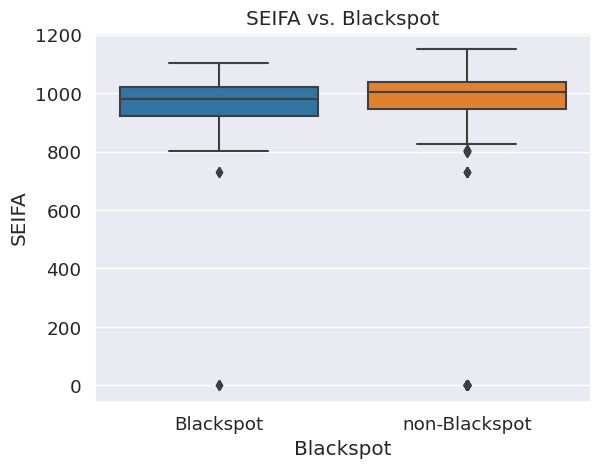

In [ ]:
sns.boxplot(x='Blackspot', y='SEIFA', data=records)
plt.title("SEIFA vs. Blackspot")
plt.show()

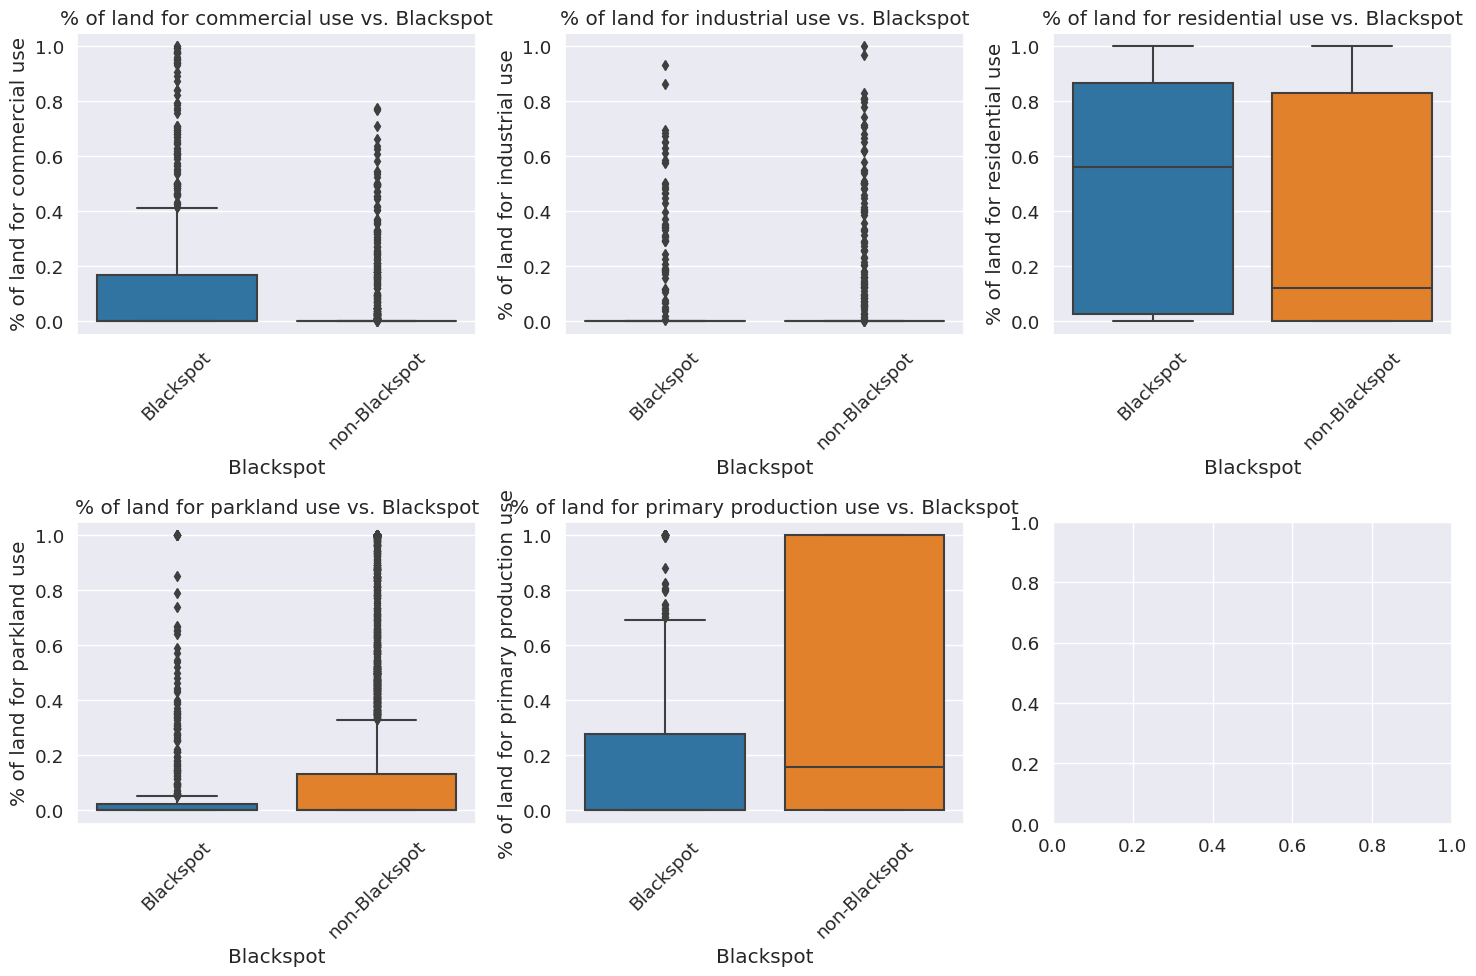

In [ ]:
land_labels = {
    'Commercial%': '% of land for commercial use',
    'Industrial%':'% of land for industrial use',
    'Residential%':'% of land for residential use',
    'Parkland%':'% of land for parkland use',
    'Primary_Production%':'% of land for primary production use'
}

land_use_columns = ['Commercial%', 'Industrial%', 'Residential%', 'Parkland%', 'Primary_Production%']

num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for idx, col in enumerate(land_use_columns):
    ax = axes[idx // num_cols, idx % num_cols]
    sns.boxplot(x='Blackspot', y=col, data=records, ax=ax)
    ax.set_title(f"{land_labels[col]} vs. Blackspot")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('Blackspot')
    ax.set_ylabel(land_labels[col])

plt.tight_layout()
plt.show()

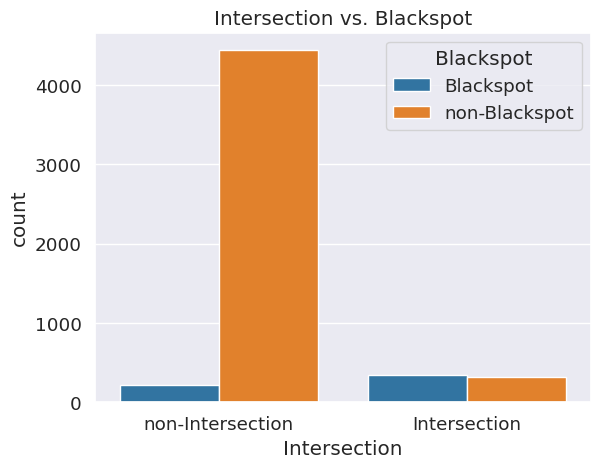

In [ ]:
sns.countplot(x='Intersection', hue='Blackspot', data=records)
plt.title("Intersection vs. Blackspot")
plt.show()

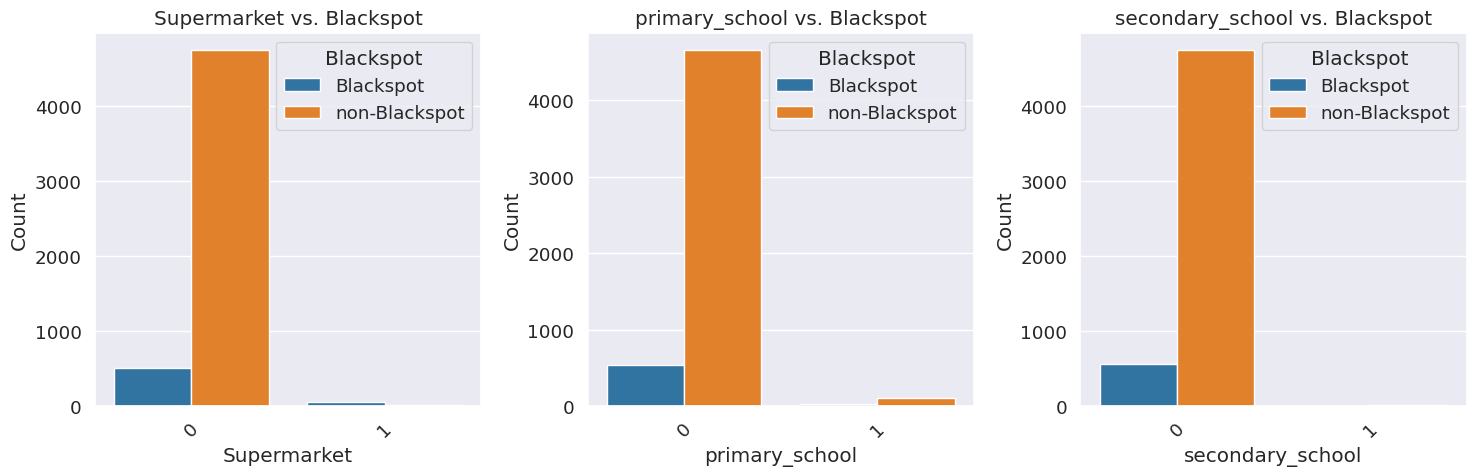

In [ ]:
facilities_columns = ['Supermarket', 'primary_school', 'secondary_school']
num_cols = 3
num_rows = (len(facilities_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for idx, col in enumerate(facilities_columns):
    ax = axes[idx // num_cols, idx % num_cols] if num_rows > 1 else axes[idx % num_cols]
    sns.countplot(x=col, hue='Blackspot', data=records, ax=ax)
    ax.set_title(f"{col} vs. Blackspot")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

for i in range(len(facilities_columns), num_rows * num_cols):
    if num_rows > 1:
        fig.delaxes(axes.flatten()[i])
    else:
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


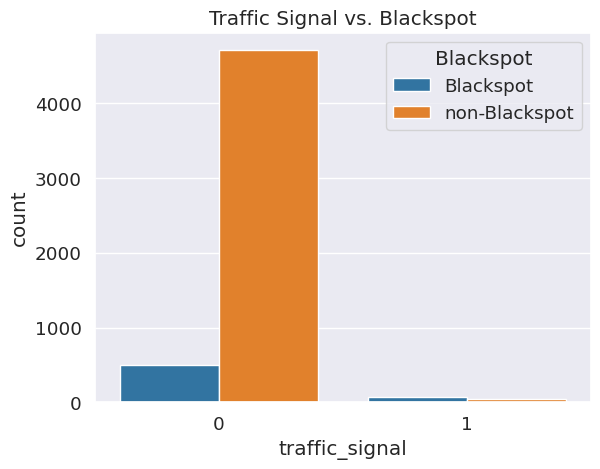

In [ ]:
sns.countplot(x='traffic_signal', hue='Blackspot', data=records)
plt.title("Traffic Signal vs. Blackspot")
plt.show()

In [ ]:
records['Blackspot'].value_counts()

non-Blackspot    4759
Blackspot         567
Name: Blackspot, dtype: int64

In [ ]:
records['Blackspot'].value_counts(normalize=True).round(4)

non-Blackspot   0.893
Blackspot       0.106
Name: Blackspot, dtype: float64

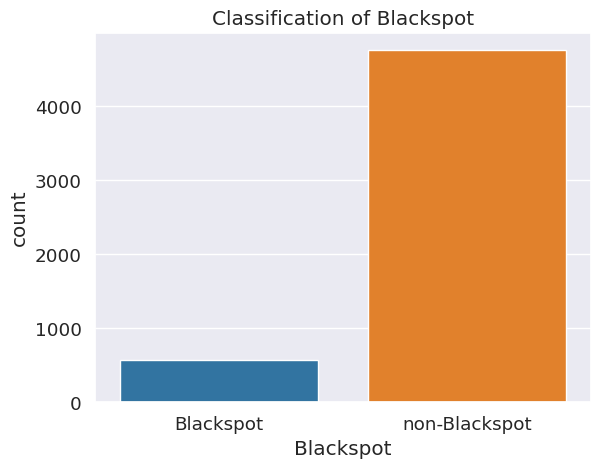

In [ ]:
sns.countplot(x='Blackspot', data=records)
plt.title("Classification of Blackspot")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cat_variables = ['ROAD_TYPE','Intersection']
records[cat_variables] = records[cat_variables].apply(encoder.fit_transform)

records.head()

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_18YRS_OVER_PCNT,CARS_ZERO_HH_PCNT,CARS_ONE_HH_PCNT,CARS_TWO_OR_MORE_HH_PCNT,SEIFA,Commercial%,Industrial%,Residential%,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,3,0.122,0.854,0.068,0.429,0.461,1037,0.244,0.000,0.267,0.358,0.000,14.000,1,0,0,0,0,0,Blackspot
1,3,0.216,0.742,0.011,0.225,0.721,1032,0.000,0.000,0.000,0.000,1.000,0.000,0,0,0,0,1,0,Blackspot
2,3,0.185,0.757,0.000,0.178,0.785,1001,0.000,0.000,0.000,1.000,0.000,0.000,1,0,0,0,0,0,non-Blackspot
3,4,0.168,0.816,0.055,0.373,0.545,998,0.000,0.000,0.963,0.037,0.000,0.000,1,0,0,0,0,0,non-Blackspot
4,3,0.201,0.762,0.000,0.115,0.885,1049,0.000,0.000,0.000,0.000,1.000,0.000,1,0,0,0,0,0,non-Blackspot


In [ ]:
def coding_Blackspot(x):
        if x=='non-Blackspot': return 0
        if x=='Blackspot': return 1

records['Blackspot'] = records['Blackspot'].apply(coding_Blackspot)
records.head()

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_18YRS_OVER_PCNT,CARS_ZERO_HH_PCNT,CARS_ONE_HH_PCNT,CARS_TWO_OR_MORE_HH_PCNT,SEIFA,Commercial%,Industrial%,Residential%,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,3,0.122,0.854,0.068,0.429,0.461,1037,0.244,0.000,0.267,0.358,0.000,14.000,1,0,0,0,0,0,1
1,3,0.216,0.742,0.011,0.225,0.721,1032,0.000,0.000,0.000,0.000,1.000,0.000,0,0,0,0,1,0,1
2,3,0.185,0.757,0.000,0.178,0.785,1001,0.000,0.000,0.000,1.000,0.000,0.000,1,0,0,0,0,0,0
3,4,0.168,0.816,0.055,0.373,0.545,998,0.000,0.000,0.963,0.037,0.000,0.000,1,0,0,0,0,0,0
4,3,0.201,0.762,0.000,0.115,0.885,1049,0.000,0.000,0.000,0.000,1.000,0.000,1,0,0,0,0,0,0


In [ ]:
records['Blackspot'].value_counts()

0    4759
1     567
Name: Blackspot, dtype: int64

#1 = Blackspot
#0 = Non-blackpot

###The dataset has  4759 non-blackspot and 567 blackspot.

<Axes: >

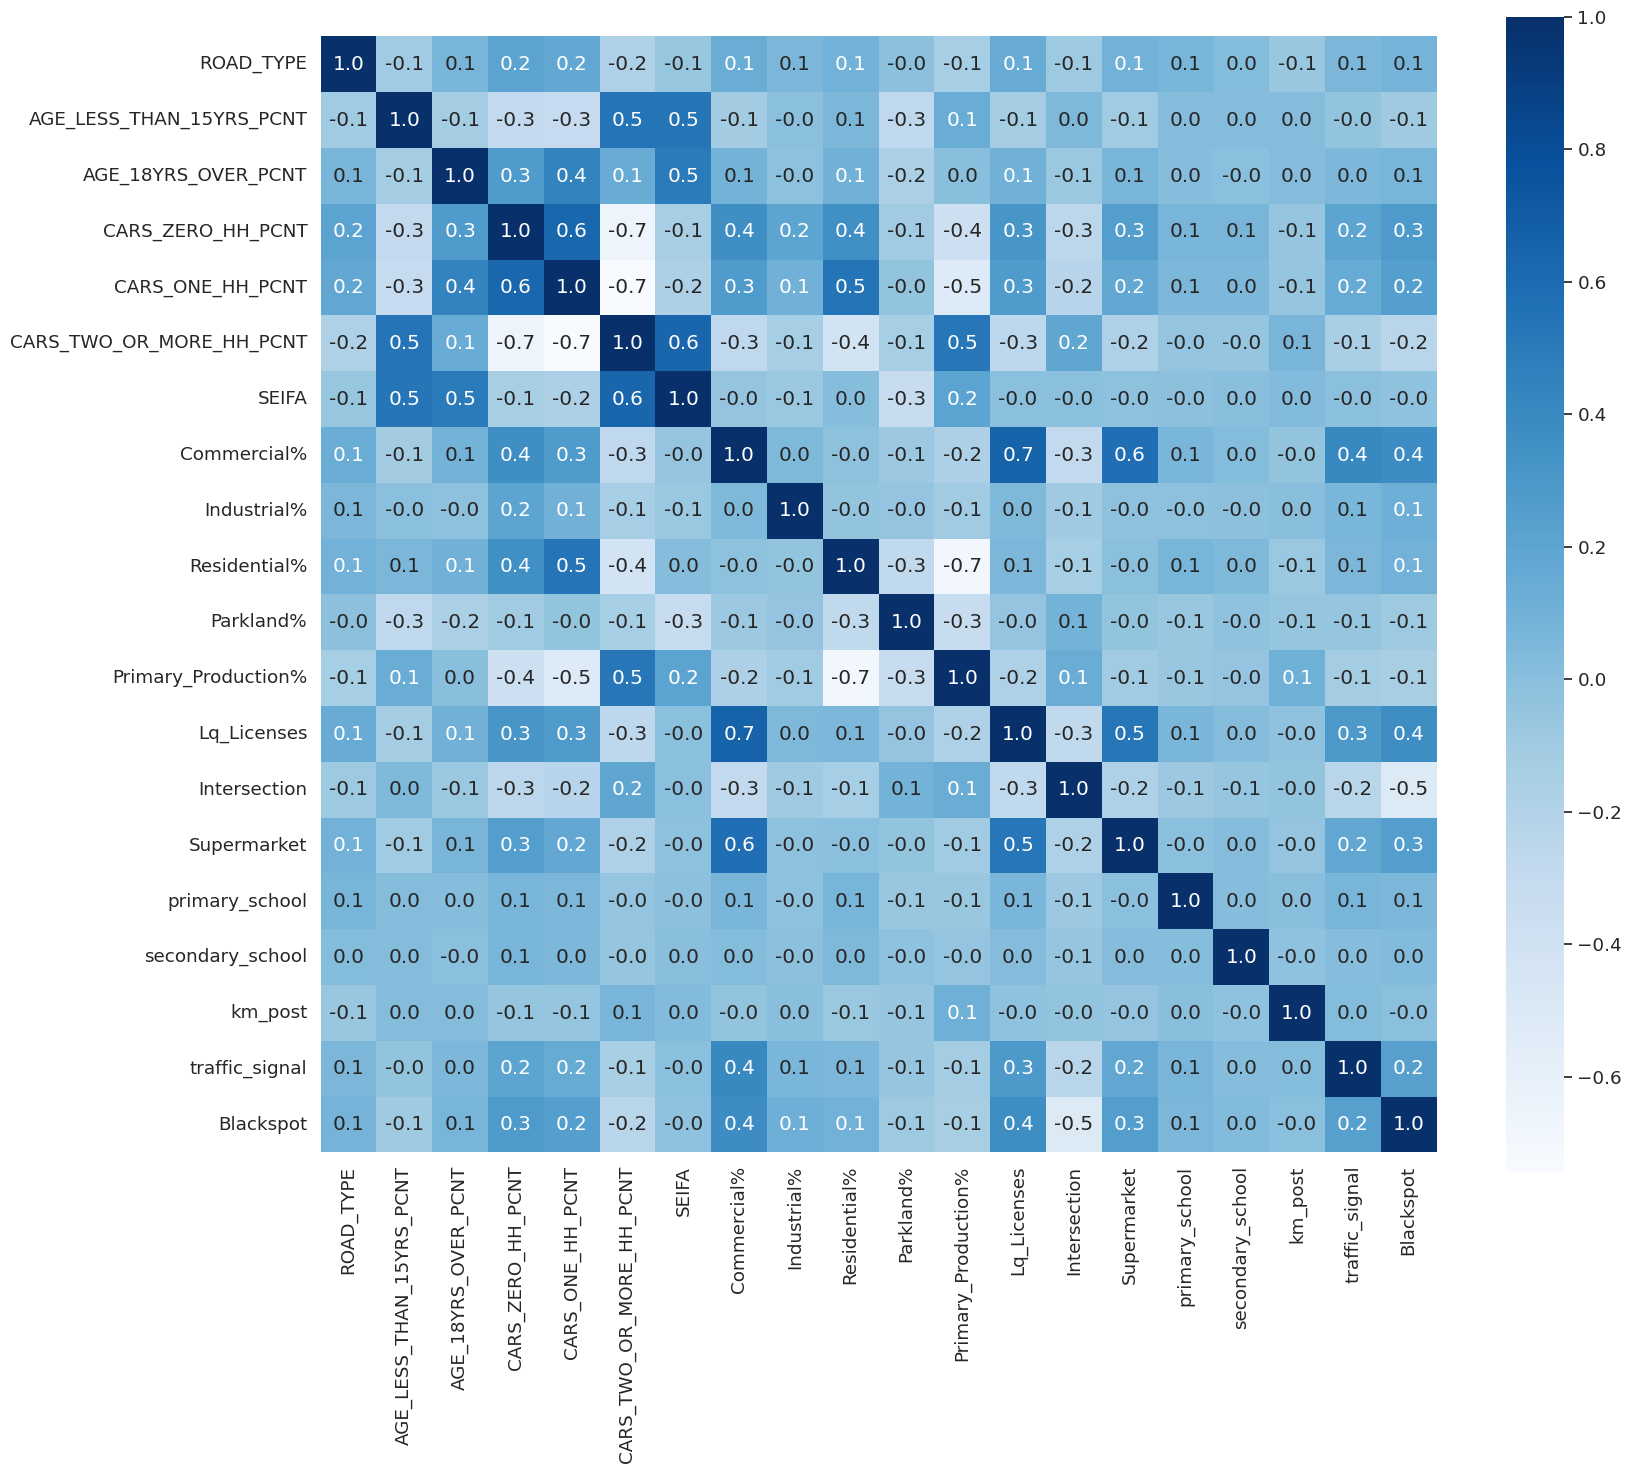

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(records.corr(), cmap='Blues', square=True, annot=True, fmt=".1f")

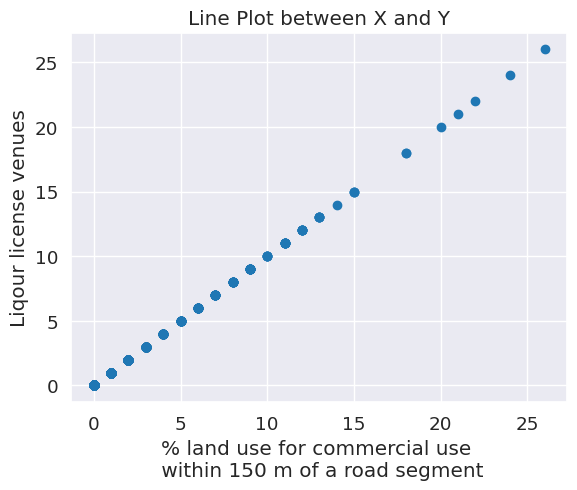

In [ ]:
X=records['Commercial%']
y=records['Lq_Licenses']
plt.scatter(x, y)
plt.xlabel('% land use for commercial use \n within 150 m of a road segment')
plt.ylabel('Liqour license venues')
plt.title('Line Plot between X and Y')
plt.show()

In [ ]:
first_column=records.pop('Blackspot')
records.insert(0,'Blackspot',first_column)
records

,Blackspot,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_18YRS_OVER_PCNT,CARS_ZERO_HH_PCNT,CARS_ONE_HH_PCNT,CARS_TWO_OR_MORE_HH_PCNT,SEIFA,Commercial%,Industrial%,Residential%,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal
0,1,3,0.122,0.854,0.068,0.429,0.461,1037,0.244,0.000,0.267,0.358,0.000,14.000,1,0,0,0,0,0
1,1,3,0.216,0.742,0.011,0.225,0.721,1032,0.000,0.000,0.000,0.000,1.000,0.000,0,0,0,0,1,0
2,0,3,0.185,0.757,0.000,0.178,0.785,1001,0.000,0.000,0.000,1.000,0.000,0.000,1,0,0,0,0,0
3,0,4,0.168,0.816,0.055,0.373,0.545,998,0.000,0.000,0.963,0.037,0.000,0.000,1,0,0,0,0,0
4,0,3,0.201,0.762,0.000,0.115,0.885,1049,0.000,0.000,0.000,0.000,1.000,0.000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,0,3,0.152,0.813,0.053,0.342,0.566,887,0.000,0.000,0.000,1.000,0.000,0.000,1,0,0,0,1,0
5322,0,2,0.142,0.817,0.036,0.308,0.604,891,0.000,0.000,0.844,0.000,0.156,0.000,1,0,0,0,0,0
5323,0,3,0.164,0.779,0.000,0.106,0.830,1060,0.000,0.000,0.000,0.000,1.000,0.000,1,0,0,0,1,0
5324,0,3,0.155,0.806,0.000,0.203,0.772,1006,0.000,0.000,0.000,0.000,1.000,0.000,1,0,0,0,0,0


<Axes: xlabel='Lq_Licenses', ylabel='Blackspot'>

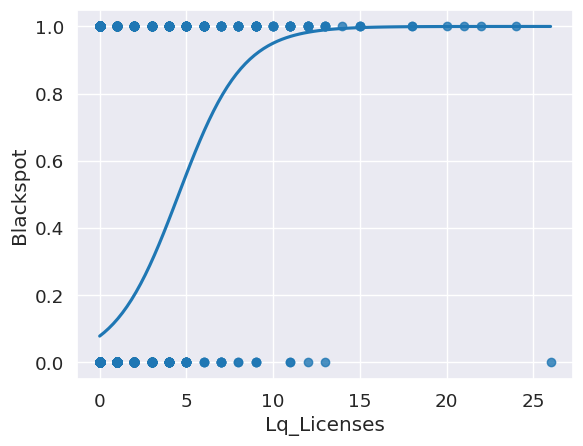

In [ ]:
sns.regplot(x=records['Lq_Licenses'], y=records['Blackspot'], logistic=True, ci=None)

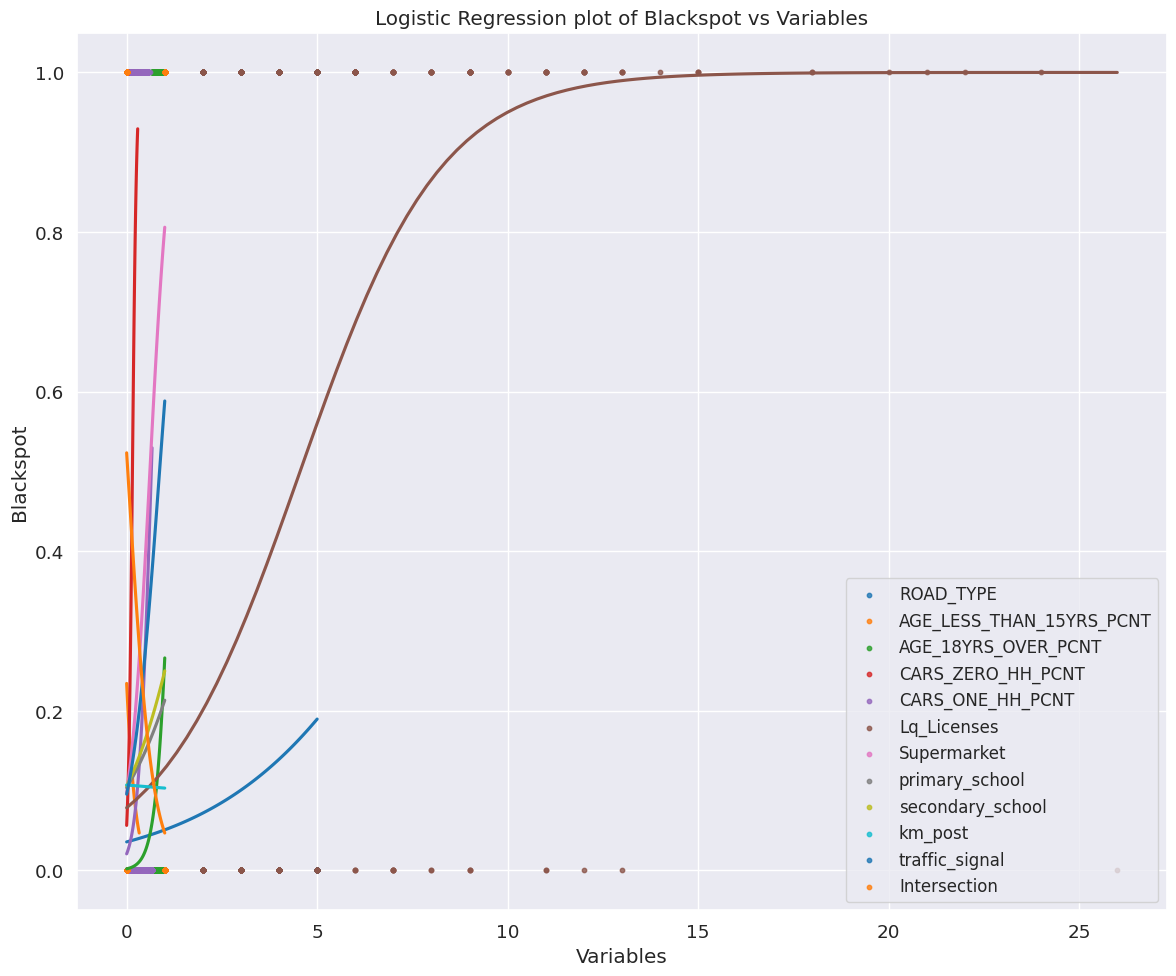

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = ['ROAD_TYPE', 'AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT', 'AGE_45_64YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT', 'CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'Lq_Licenses', 'Supermarket', 'primary_school', 'secondary_school', 'km_post', 'traffic_signal', 'Intersection']

# Create a larger plot area
plt.figure(figsize=(12, 10))

# Loop through columns and create plots
for col in columns_to_plot:
    if col in records.columns:
        sns.regplot(data=records, x=col, y='Blackspot', logistic=True, ci=None, scatter_kws={'s': 10}, label=col)

# Set labels and title
plt.xlabel('Variables')
plt.ylabel('Blackspot')
plt.title('Logistic Regression plot of Blackspot vs Variables')

# Configure the legend
plt.legend(fontsize='small', loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()


<a id = "cell_modeling"></a>
## 3. Machine learning model development



In [ ]:
X=records.iloc[:,1:21]
y=records['Blackspot']

In [ ]:
# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)  # 80% training and 20% testing

#inspect the split datasets
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 521 to 3927
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ROAD_TYPE                 4260 non-null   int64  
 1   AGE_LESS_THAN_15YRS_PCNT  4260 non-null   float64
 2   AGE_18YRS_OVER_PCNT       4260 non-null   float64
 3   CARS_ZERO_HH_PCNT         4260 non-null   float64
 4   CARS_ONE_HH_PCNT          4260 non-null   float64
 5   CARS_TWO_OR_MORE_HH_PCNT  4260 non-null   float64
 6   SEIFA                     4260 non-null   int64  
 7   Commercial%               4260 non-null   float64
 8   Industrial%               4260 non-null   float64
 9   Residential%              4260 non-null   float64
 10  Parkland%                 4260 non-null   float64
 11  Primary_Production%       4260 non-null   float64
 12  Lq_Licenses               4260 non-null   float64
 13  Intersection              4260 non-null   int64  
 14  Superm

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X.shape

(5326, 19)

In [ ]:
forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1), k_features=(1,19), forward=True, floating=False, verbose=2, scoring="accuracy", cv=5).fit(X_train, y_train)


[2023-08-11 03:23:18] Features: 1/19 -- score: 0.9046948356807512
[2023-08-11 03:23:52] Features: 2/19 -- score: 0.9150234741784038
[2023-08-11 03:24:24] Features: 3/19 -- score: 0.9178403755868544
[2023-08-11 03:25:01] Features: 4/19 -- score: 0.9190140845070423
[2023-08-11 03:25:33] Features: 5/19 -- score: 0.9185446009389672
[2023-08-11 03:26:07] Features: 6/19 -- score: 0.92018779342723
[2023-08-11 03:26:38] Features: 7/19 -- score: 0.9206572769953052
[2023-08-11 03:27:07] Features: 8/19 -- score: 0.92018779342723
[2023-08-11 03:27:37] Features: 9/19 -- score: 0.9206572769953052
[2023-08-11 03:28:03] Features: 10/19 -- score: 0.9208920187793428
[2023-08-11 03:28:28] Features: 11/19 -- score: 0.9211267605633802
[2023-08-11 03:28:50] Features: 12/19 -- score: 0.9225352112676056
[2023-08-11 03:29:09] Features: 13/19 -- score: 0.919718309859155
[2023-08-11 03:29:27] Features: 14/19 -- score: 0.9192488262910798
[2023-08-11 03:29:42] Features: 15/19 -- score: 0.92018779342723
[2023-08-1

In [ ]:
forward_feature_selector.k_feature_names_

('AGE_LESS_THAN_15YRS_PCNT',
 'AGE_18YRS_OVER_PCNT',
 'CARS_ZERO_HH_PCNT',
 'CARS_ONE_HH_PCNT',
 'CARS_TWO_OR_MORE_HH_PCNT',
 'SEIFA',
 'Industrial%',
 'Parkland%',
 'Primary_Production%',
 'Lq_Licenses',
 'Intersection',
 'Supermarket')

In [ ]:
forward_feature_selector.k_score_

0.9225352112676056

In [ ]:
pd.DataFrame.from_dict(forward_feature_selector.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.903755868544601, 0.903755868544601, 0.90375...",0.905,"(Lq_Licenses,)",0.001,0.001,0.001
2,"(12, 13)","[0.9107981220657277, 0.9096244131455399, 0.920...",0.915,"(Lq_Licenses, Intersection)",0.005,0.004,0.002
3,"(3, 12, 13)","[0.9178403755868545, 0.9143192488262911, 0.921...",0.918,"(CARS_ZERO_HH_PCNT, Lq_Licenses, Intersection)",0.003,0.003,0.001
4,"(3, 8, 12, 13)","[0.9190140845070423, 0.9096244131455399, 0.924...",0.919,"(CARS_ZERO_HH_PCNT, Industrial%, Lq_Licenses, ...",0.007,0.005,0.003
5,"(3, 6, 8, 12, 13)","[0.9131455399061033, 0.9072769953051644, 0.920...",0.919,"(CARS_ZERO_HH_PCNT, SEIFA, Industrial%, Lq_Lic...",0.011,0.008,0.004
6,"(1, 3, 6, 8, 12, 13)","[0.9190140845070423, 0.9107981220657277, 0.923...",0.920,"(AGE_LESS_THAN_15YRS_PCNT, CARS_ZERO_HH_PCNT, ...",0.009,0.007,0.004
7,"(1, 2, 3, 6, 8, 12, 13)","[0.9178403755868545, 0.9072769953051644, 0.921...",0.921,"(AGE_LESS_THAN_15YRS_PCNT, AGE_18YRS_OVER_PCNT...",0.010,0.008,0.004
8,"(1, 2, 3, 6, 8, 12, 13, 14)","[0.92018779342723, 0.9131455399061033, 0.91666...",0.920,"(AGE_LESS_THAN_15YRS_PCNT, AGE_18YRS_OVER_PCNT...",0.009,0.007,0.003
9,"(1, 2, 3, 5, 6, 8, 12, 13, 14)","[0.9143192488262911, 0.9107981220657277, 0.919...",0.921,"(AGE_LESS_THAN_15YRS_PCNT, AGE_18YRS_OVER_PCNT...",0.011,0.008,0.004
10,"(1, 2, 3, 4, 5, 6, 8, 12, 13, 14)","[0.9178403755868545, 0.9107981220657277, 0.921...",0.921,"(AGE_LESS_THAN_15YRS_PCNT, AGE_18YRS_OVER_PCNT...",0.012,0.010,0.005


In [ ]:
selected_indices = list(forward_feature_selector.k_feature_idx_)

In [ ]:
X_train_selected = X_train.iloc[:, selected_indices]
X_test_selected = X_test.iloc[:, selected_indices]

In [ ]:
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train_selected, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test_selected)

In [ ]:
inspection = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
inspection = pd.concat([X_train_selected.reset_index(drop=True), inspection.reset_index(drop=True)], axis=1)
inspection.head(20)


,AGE_LESS_THAN_15YRS_PCNT,AGE_18YRS_OVER_PCNT,CARS_ZERO_HH_PCNT,CARS_ONE_HH_PCNT,CARS_TWO_OR_MORE_HH_PCNT,SEIFA,Industrial%,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,Actual,Predicted
0,0.156,0.790,0.040,0.240,0.640,915,0.000,0.975,0.000,0.000,1,0,0.000,0.000
1,0.207,0.759,0.000,0.129,0.851,1099,0.000,0.000,0.000,1.000,1,0,1.000,0.000
2,0.172,0.790,0.052,0.362,0.539,977,0.000,0.000,0.327,0.000,1,0,0.000,0.000
3,0.176,0.772,0.109,0.413,0.425,920,0.000,0.000,0.000,4.000,0,1,0.000,1.000
4,0.168,0.814,0.034,0.341,0.591,975,0.000,0.000,0.234,0.000,1,0,0.000,0.000
5,0.172,0.779,0.000,0.180,0.820,1016,0.000,0.000,1.000,0.000,1,0,0.000,0.000
6,0.273,0.677,0.000,0.257,0.716,929,0.000,0.515,0.000,0.000,1,0,1.000,0.000
7,0.097,0.875,0.000,0.301,0.602,943,0.000,0.000,1.000,0.000,1,0,0.000,0.000
8,0.106,0.836,0.037,0.305,0.659,1050,0.000,0.186,0.000,0.000,1,0,0.000,0.000
9,0.201,0.741,0.000,0.135,0.841,1016,0.000,0.000,0.355,1.000,1,0,0.000,0.000


In [ ]:
coefficients = logreg.coef_.flatten()
coef_df = pd.DataFrame({'Feature': X_train_selected.columns, 'Coefficient': coefficients})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
print(coef_df)

                     Feature  Coefficient
10              Intersection       -2.759
4   CARS_TWO_OR_MORE_HH_PCNT       -1.832
3           CARS_ONE_HH_PCNT        1.253
6                Industrial%        1.184
7                  Parkland%       -1.118
11               Supermarket        1.014
2          CARS_ZERO_HH_PCNT        0.622
1        AGE_18YRS_OVER_PCNT        0.399
0   AGE_LESS_THAN_15YRS_PCNT       -0.367
9                Lq_Licenses        0.251
8        Primary_Production%       -0.056
5                      SEIFA       -0.000


<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics using y_test and y_pred
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the computed metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9015
Precision: 0.5556
Recall: 0.3947
F1-Score: 0.4615


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[916  36]
 [ 69  45]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       952
           1       0.56      0.39      0.46       114

    accuracy                           0.90      1066
   macro avg       0.74      0.68      0.70      1066
weighted avg       0.89      0.90      0.89      1066



In [ ]:
probabilities = logreg.predict_proba(X_test_selected)
y_prob = probabilities[:, 1]

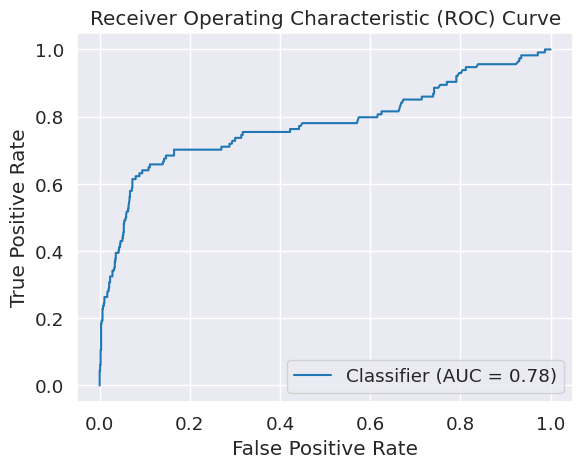

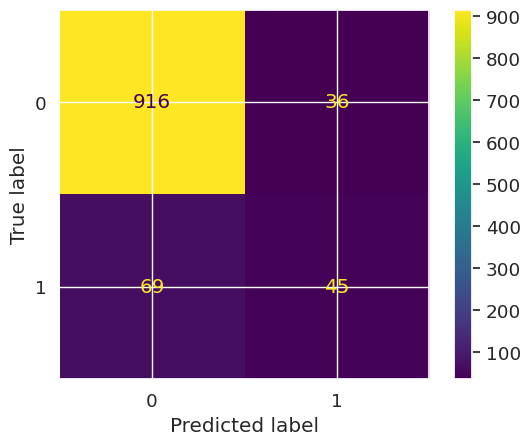

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
roc_display = RocCurveDisplay.from_predictions(y_test, y_prob)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

confusion_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()


Axes(0.125,0.11;0.775x0.77)


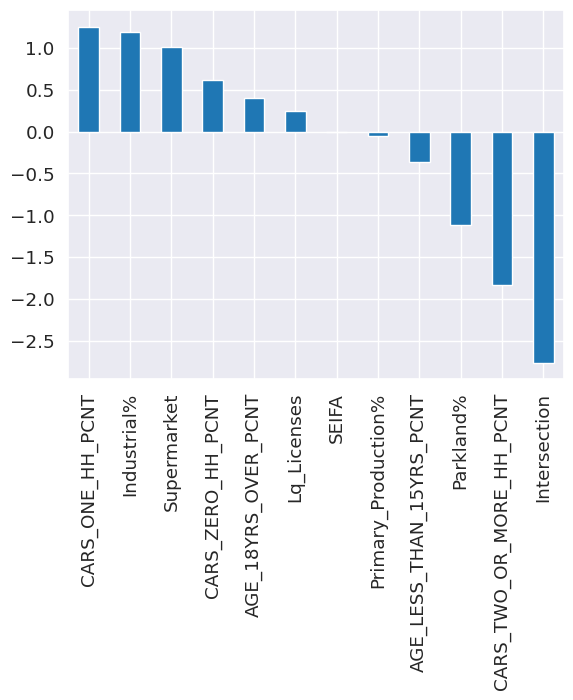

In [ ]:
coefs = pd.Series(logreg.coef_[0], index=X_train_selected.columns.values)
print (coefs.sort_values(ascending = False).plot(kind='bar'))

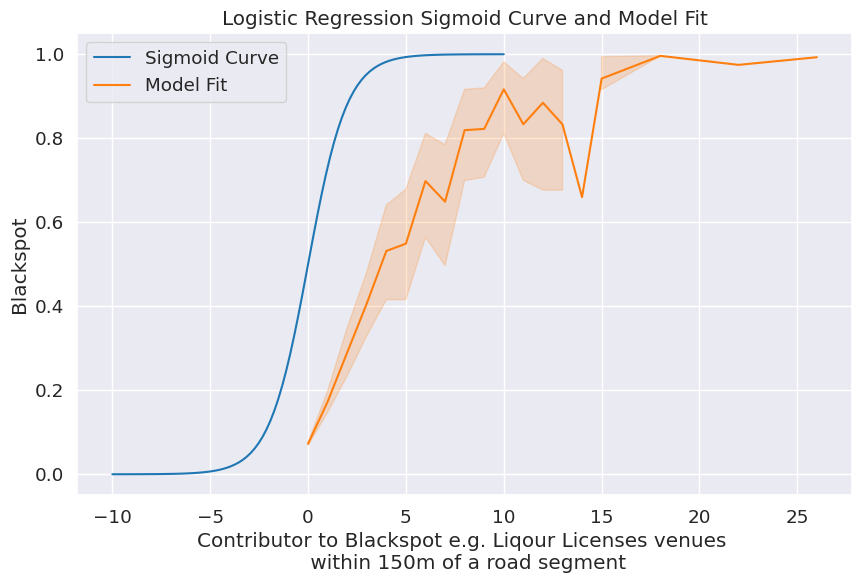

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a sequence of points along the x axis
x_vals = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the sigmoid function
y_vals_sigmoid = sigmoid(x_vals)

coef = logreg.coef_.flatten()
intercept = logreg.intercept_

# Calculate the model fit values for each feature
model_fit = np.dot(X_train_selected, coef) + intercept

# Calculate the predicted probabilities using the sigmoid function
y_vals_model = sigmoid(model_fit)

# Plot the sigmoid curve and the model fit curve
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_vals, y=y_vals_sigmoid, label='Sigmoid Curve')
sns.lineplot(x=X_train_selected['Lq_Licenses'], y=y_vals_model, label='Model Fit')
sns.scatterplot(x=X_train_selected['Lq_Licenses'], y=y_test, color='blue', label='Actual Data')
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.2)
plt.xlabel('Contributor to Blackspot e.g. Liqour Licenses venues \n within 150m of a road segment')
plt.ylabel('Blackspot')
plt.title('Logistic Regression Sigmoid Curve and Model Fit')
plt.legend()
plt.show()


In [ ]:
print('Blackspot_N = ', '%.3f' % intercept, '+', '%.3f' %coef[0], 'AGE_LESS_THAN_15YRS_PCNT', '+', '%.3f' %coef[1], 'AGE_18YRS_OVER_PCNT', '+', '%.3f' %coef[2], 'CARS_ZERO_HH_PCNT', '+', '%.3f' %coef[3], 'CARS_ONE_HH_PCNT', '+', '%.3f' %coef[4], 'CARS_TWO_OR_MORE_HH_PCNT', '+', '%.3f' %coef[5], 'SEIFA', '%.3f' %coef[6], 'Industrial%', '%.3f' %coef[7], 'Parkland%', '%.3f' %coef[8], 'Primary_Production%', '%.3f' %coef[9], 'Lq_Licenses', '%.3f' %coef[10],'Intersection', '%.3f' %coef[11],'Supermarket')

Blackspot_N =  0.308 + -0.367 AGE_LESS_THAN_15YRS_PCNT + 0.399 AGE_18YRS_OVER_PCNT + 0.622 CARS_ZERO_HH_PCNT + 1.253 CARS_ONE_HH_PCNT + -1.832 CARS_TWO_OR_MORE_HH_PCNT + -0.000 SEIFA 1.184 Industrial% -1.118 Parkland% -0.056 Primary_Production% 0.251 Lq_Licenses -2.759 Intersection 1.014 Supermarket
